In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
df1=pd.read_csv('/content/Alcohol_Sales.csv')
df2=pd.read_csv('/content/Miles_Traveled.csv')

In [3]:
df1.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [4]:
df2.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [6]:
df3=pd.merge(df1,df2,on='DATE')

In [7]:
df3.head()

,DATE,S4248SM144NCEN,TRFVOLUSM227NFWA
0,1992-01-01,3459,167652.0
1,1992-02-01,3458,160204.0
2,1992-03-01,4002,183778.0
3,1992-04-01,4564,186069.0
4,1992-05-01,4221,196725.0


In [33]:
column_to_forecast = 'S4248SM144NCEN'

In [34]:
column_to_forecast

'S4248SM144NCEN'

In [36]:
# Prepare the time series dataframe
ts = df3[['DATE', column_to_forecast]].rename(columns={'DATE': 'ds', column_to_forecast: 'y'})

In [37]:
ts

,ds,y
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
319,2018-08-01,14257
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174


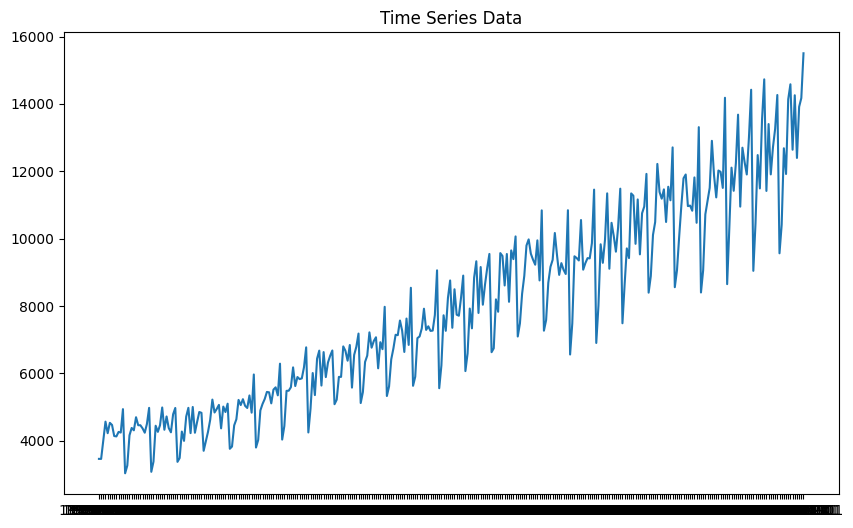

In [38]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ts['ds'], ts['y'])
plt.title('Time Series Data')
plt.show()

In [39]:
# Split the data into train and test sets
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

In [40]:
# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

In [41]:
# ARIMA Model
arima_model = ARIMA(train['y'], order=(5, 1, 0))
arima_fit = arima_model.fit()

arima_forecast = arima_fit.forecast(steps=len(test))
arima_rmse, arima_mae = evaluate_model(test['y'], arima_forecast)

print(f'ARIMA RMSE: {arima_rmse}')
print(f'ARIMA MAE: {arima_mae}')

ARIMA RMSE: 1885.5557738597497
ARIMA MAE: 1511.583461922305


In [42]:
# Prophet Model
prophet_model = Prophet()
prophet_model.fit(train)

future = prophet_model.make_future_dataframe(periods=len(test))
prophet_forecast = prophet_model.predict(future)

# Extract the forecasted values for the test set
prophet_forecast_test = prophet_forecast['yhat'][-len(test):].values
prophet_rmse, prophet_mae = evaluate_model(test['y'], prophet_forecast_test)

print(f'Prophet RMSE: {prophet_rmse}')
print(f'Prophet MAE: {prophet_mae}')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok90352y/avven1w0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok90352y/kn_1x_ze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2778', 'data', 'file=/tmp/tmpok90352y/avven1w0.json', 'init=/tmp/tmpok90352y/kn_1x_ze.json', 'output', 'file=/tmp/tmpok90352y/prophet_modelxc3lltpu/prophet_model-20240715085048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:50:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:50:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 2435.9543096642856
Prophet MAE: 2008.6401421549149


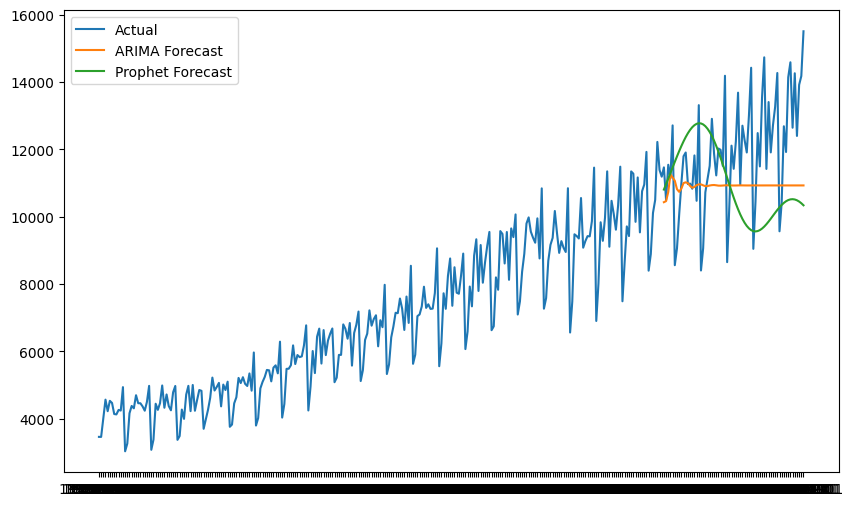

In [43]:
# Plot the forecasts
plt.figure(figsize=(10, 6))
plt.plot(ts['ds'], ts['y'], label='Actual')
plt.plot(test['ds'], arima_forecast, label='ARIMA Forecast')
plt.plot(test['ds'], prophet_forecast_test, label='Prophet Forecast')
plt.legend()
plt.show()

In [44]:
column_to_forecast1='TRFVOLUSM227NFWA'

In [45]:
# Prepare the time series dataframe
ts = df3[['DATE', column_to_forecast]].rename(columns={'DATE': 'ds', column_to_forecast: 'y'})

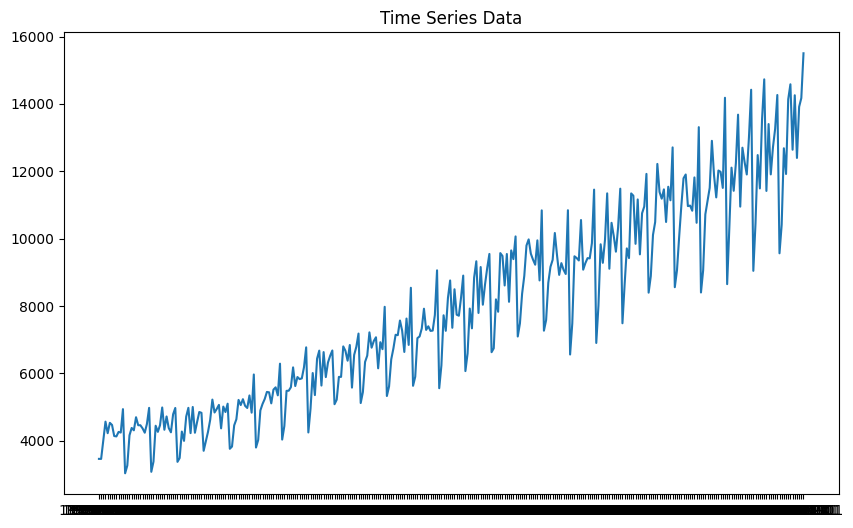

In [46]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ts['ds'], ts['y'])
plt.title('Time Series Data')
plt.show()


In [47]:
# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# ARIMA Model
arima_model = ARIMA(train['y'], order=(5, 1, 0))
arima_fit = arima_model.fit()

arima_forecast = arima_fit.forecast(steps=len(test))
arima_rmse, arima_mae = evaluate_model(test['y'], arima_forecast)

print(f'ARIMA RMSE: {arima_rmse}')
print(f'ARIMA MAE: {arima_mae}')

ARIMA RMSE: 1885.5557738597497
ARIMA MAE: 1511.583461922305


In [48]:
# Prophet Model
prophet_model = Prophet()
prophet_model.fit(train)

future = prophet_model.make_future_dataframe(periods=len(test))
prophet_forecast = prophet_model.predict(future)

# Extract the forecasted values for the test set
prophet_forecast_test = prophet_forecast['yhat'][-len(test):].values
prophet_rmse, prophet_mae = evaluate_model(test['y'], prophet_forecast_test)

print(f'Prophet RMSE: {prophet_rmse}')
print(f'Prophet MAE: {prophet_mae}')


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok90352y/utpa3rno.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok90352y/jyjav5y3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42404', 'data', 'file=/tmp/tmpok90352y/utpa3rno.json', 'init=/tmp/tmpok90352y/jyjav5y3.json', 'output', 'file=/tmp/tmpok90352y/prophet_modeljj1k81qs/prophet_model-20240715085344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:53:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:53:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 2435.9543096642856
Prophet MAE: 2008.6401421549149


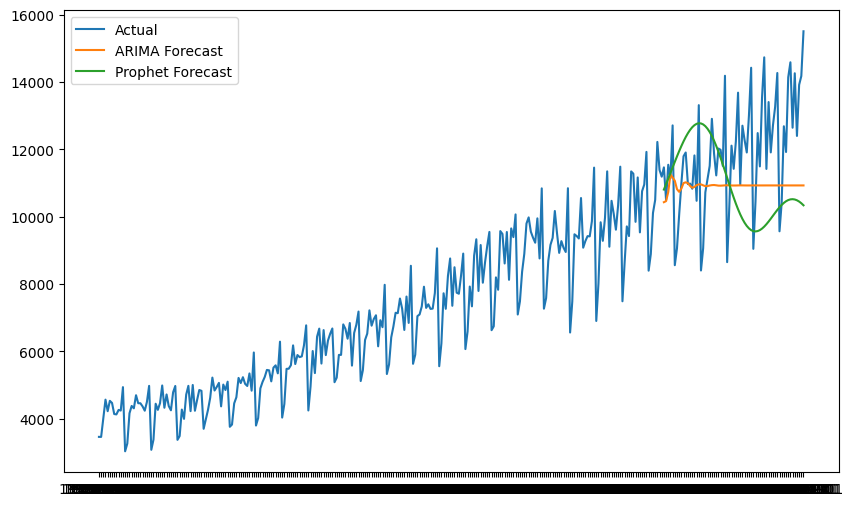

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(ts['ds'], ts['y'], label='Actual')
plt.plot(test['ds'], arima_forecast, label='ARIMA Forecast')
plt.plot(test['ds'], prophet_forecast_test, label='Prophet Forecast')
plt.legend()
plt.show()